In [1]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.transforms as transforms
import torchvision.datasets
import numpy as np
from collections import OrderedDict
import matplotlib.pyplot as plt

In [2]:
num_epochs = 5
batch_size = 100

In [3]:
DATA_PATH = '/'

In [4]:
# Normalize the values so the neural net trains better
trans = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.1307,), (0.3081,))])
MNIST_train = torchvision.datasets.MNIST(root=DATA_PATH, train=True, transform=trans, download=True)
MNIST_test = torchvision.datasets.MNIST(root=DATA_PATH, train=False, transform=trans)
len(MNIST_train.train_labels)

C:\Users\rod_i\anaconda3\lib\site-packages\torchvision\datasets\mnist.py:45: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


60000

In [5]:
# Divide the data into batches
train = DataLoader(dataset=MNIST_train, batch_size=batch_size)
test = DataLoader(dataset=MNIST_test, batch_size=batch_size)

In [6]:
class ConvNet(nn.Module):
    def __init__(self):
        super(ConvNet, self).__init__()
        
        # decided to have kernel size = 5, since step is 1 then padding = 2 in conv1
        self.layer1 = nn.Sequential(OrderedDict([
            ('conv1', nn.Conv2d(1, 32, 5, 1, 2)),
            ('relu1', nn.ReLU()),
            ('maxpool1', nn.MaxPool2d(2, 2))
        ]))
        self.layer2 = nn.Sequential(OrderedDict([
            ('conv2', nn.Conv2d(32, 64, 5, 1, 2)),
            ('relu2', nn.ReLU()),
            ('maxpool2', nn.MaxPool2d(2, 2))
        ]))
        self.drop_out = nn.Dropout()
        # three fc layers with relu
        self.fc1 = nn.Linear(7 * 7 * 64, 1000)
        self.act1 = nn.ReLU()
        self.fc2 = nn.Linear(1000, 100)
        self.act2 = nn.ReLU()
        self.fc3 = nn.Linear(100, 10)
    def forward(self, x):
        # forward structure follows the nn structure
        x = self.layer1(x)
        x = self.layer2(x)
        x = x.reshape(x.size(0), -1)
        x = self.drop_out(x)
        x = self.fc1(x)
        x = self.act1(x)
        x = self.fc2(x)
        x = self.act2(x)
        x = self.fc3(x)
        return x


In [7]:
def train_n_test(model, train, test, criterion, epochs = 5, learning_rate = 1.0e-3):
    optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)
    accuracies = []
    losses = []
    for epoch in range(num_epochs):
        for i, (images, labels) in enumerate(train):
            outputs = model(images)
            loss = criterion(outputs, labels)
            losses.append(loss.item())
            
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            
            total = labels.size(0)
            _, predicted = torch.max(outputs.data, 1)
            correct = (predicted == labels).sum().item()
            accuracies.append(correct / total)
            
            if (i + 1) % 100 == 0:
                print("Epoch ", epoch, " Iter ", i + 1, " loss ", loss.item(), " accuracy ", accuracies[-1])
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for images, labels in test:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
        print("Test Accuracy ", (correct / total) * 100)
    return accuracies, losses

In [8]:
accuracies, losses = train_n_test(ConvNet(), train, test, nn.CrossEntropyLoss())

Epoch  0  Iter  100  loss  0.0823177695274353  accuracy  0.97
Epoch  0  Iter  200  loss  0.04295896366238594  accuracy  0.99
Epoch  0  Iter  300  loss  0.09864789992570877  accuracy  0.97
Epoch  0  Iter  400  loss  0.10186959058046341  accuracy  0.94
Epoch  0  Iter  500  loss  0.11377422511577606  accuracy  0.94
Epoch  0  Iter  600  loss  0.18717123568058014  accuracy  0.99
Epoch  1  Iter  100  loss  0.015315060503780842  accuracy  1.0
Epoch  1  Iter  200  loss  0.014348986558616161  accuracy  1.0
Epoch  1  Iter  300  loss  0.07412219047546387  accuracy  0.97
Epoch  1  Iter  400  loss  0.01636948622763157  accuracy  1.0
Epoch  1  Iter  500  loss  0.08030710369348526  accuracy  0.97
Epoch  1  Iter  600  loss  0.21488535404205322  accuracy  0.99
Epoch  2  Iter  100  loss  0.03316844627261162  accuracy  0.99
Epoch  2  Iter  200  loss  0.04641088843345642  accuracy  0.99
Epoch  2  Iter  300  loss  0.033303890377283096  accuracy  0.99
Epoch  2  Iter  400  loss  0.03423275798559189  accuracy

Text(0.5, 1.0, 'Accuracy')

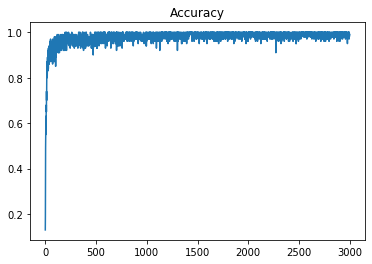

In [10]:
plt.plot(accuracies)
plt.title('Accuracy')

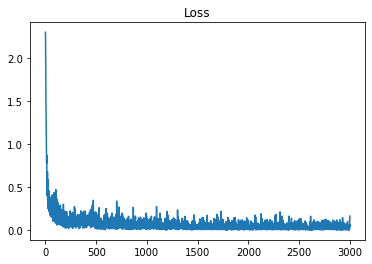

In [11]:
plt.plot(losses)
plt.title('Loss');